# ディープラーニングコードの説明

## 説明
このコードは以下の手順で実行されます：

### データの準備:
- MNISTデータセット（手書き数字）を読み込み
- データの正規化と前処理
- データローダーの設定

### モデルの構築:
- 2層のニューラルネットワークを作成
- 入力層（784ノード）→隠れ層（128ノード）→出力層（10ノード）

### 学習プロセス:
- 損失関数: クロスエントロピー損失
- 最適化手法: Adam
- エポック数: 5

## 数式の説明
モデルで使用される主な数式は以下の通りです：

### 活性化関数（ReLU）:

$f(x) = \max(0, x)$

### クロスエントロピー損失:

$L = -\sum_{i} y_i \log(\hat{y}_i)$

ここで、$y_i$は正解ラベル、$\hat{y}_i$はモデルの予測値です。

### 精度の計算:

$Accuracy = \frac{\text{正しく分類されたサンプル数}}{\text{全サンプル数}} \times 100$

## グラフの説明
コードは2つのグラフを生成します：

### 損失の推移:
- エポックごとの訓練損失の変化
- 損失が減少していれば、モデルが正しく学習していることを示します

### 精度の推移:
- エポックごとの訓練精度の変化
- 精度が上昇していれば、モデルの性能が向上していることを示します

このコードを実行すると、モデルは約95%以上の精度に達するはずです。

Epoch [1/5], Loss: 0.2884, Accuracy: 91.69%
Epoch [2/5], Loss: 0.1270, Accuracy: 96.22%
Epoch [3/5], Loss: 0.0872, Accuracy: 97.38%
Epoch [4/5], Loss: 0.0672, Accuracy: 97.92%
Epoch [5/5], Loss: 0.0514, Accuracy: 98.32%


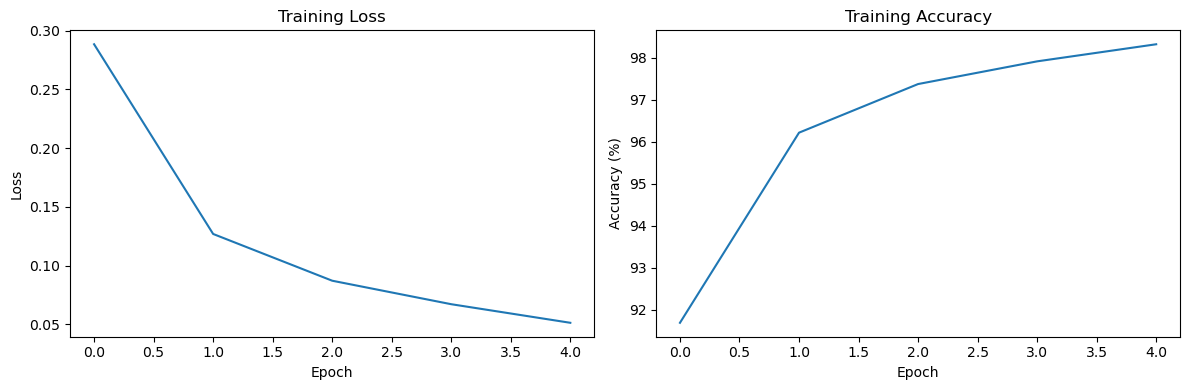

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# データの前処理とローダーの設定
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# データセットのダウンロードと準備
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                         train=True,
                                         transform=transform,
                                         download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                        train=False,
                                        transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=100,
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=100,
                                        shuffle=False)

# ニューラルネットワークの定義
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# モデル、損失関数、最適化手法の設定
model = NeuralNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練用の変数
num_epochs = 5
train_losses = []
train_accs = []

# 訓練ループ
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # 順伝播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 逆伝播と最適化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

# 結果の可視化
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

# ニューラルネットワークの可視化


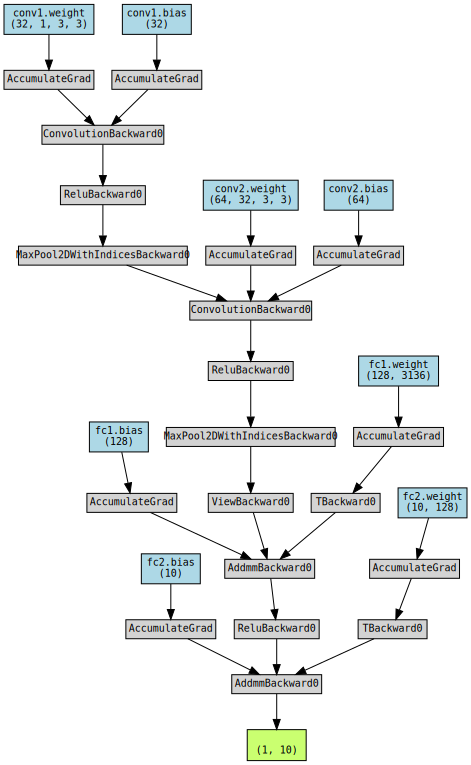

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot
from IPython.display import Image, display

# CNNモデルの定義
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 畳み込み層1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # 畳み込み層2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # プーリング層
        self.pool = nn.MaxPool2d(2)
        # 全結合層1
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # 全結合層2（出力層）
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデルのインスタンス化
model = SimpleCNN()

# サンプル入力の作成（MNISTの入力サイズ: 1x28x28）
x = torch.randn(1, 1, 28, 28)

# モデルの構造を可視化
output = model(x)
dot = make_dot(output, params=dict(model.named_parameters()))

# Jupyter Notebookにグラフを表示
display(dot)